In [1]:
# Load libraries
import numpy as np # Math
import scipy.io # Import data
import time
import sklearn.neighbors, sklearn.linear_model, sklearn.ensemble, sklearn.naive_bayes # Baseline classification techniques
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_hdf
from sklearn.model_selection import train_test_split

### Map each song to the corresponding genres and randomise the index

In [2]:
#numerical and categorical representation of genre
encoder_df = pd.read_csv('Encoder_mapping.csv',index_col=0)
encoder_df

,Encoded_Genre,Genre
0,0,Electronic
1,9,Rock
2,5,Old-Time
3,3,Indie-Rock
4,4,Jazz
5,1,Folk
6,6,Pop
7,7,Psych-Rock
8,8,Punk
9,2,Hip-Hop


In [3]:
#fma dataset with some features extracted
demo_df = pd.read_csv("demoDF.csv", index_col=0)
demo_df

,Average_zcr,Std_zcr,Average_mfcc,Std_mfcc,Encoded_Genre
song0,0.059784,0.048140,1.300539,66.319521,2.0
song1,0.032855,0.018248,3.230270,74.695595,0.0
song2,0.052183,0.020888,7.226442,65.918277,6.0


In [4]:
df = pd.merge(left=demo_df,right=encoder_df,on = ['Encoded_Genre'])
df

,Average_zcr,Std_zcr,Average_mfcc,Std_mfcc,Encoded_Genre,Genre
0,0.059784,0.048140,1.300539,66.319521,2.0,Hip-Hop
1,0.032855,0.018248,3.230270,74.695595,0.0,Electronic
2,0.052183,0.020888,7.226442,65.918277,6.0,Pop


In [5]:
df = df.reindex(np.random.permutation(df.index))
df

,Average_zcr,Std_zcr,Average_mfcc,Std_mfcc,Encoded_Genre,Genre
2,0.052183,0.020888,7.226442,65.918277,6.0,Pop
0,0.059784,0.048140,1.300539,66.319521,2.0,Hip-Hop
1,0.032855,0.018248,3.230270,74.695595,0.0,Electronic



### Load all the songs from fma_small and their corresponding features (estimated and standard deviation of their zero crossing rates and from the mel spectogram)
1. X_train matrix contains the training data
2. y_train vector contains the training labels
3. X_test matrix contains the test data
4. y_test vector contains the test labels

In [ ]:
y = df['Encoded_Genre']
y.head()

In [ ]:
X = df[['Average_zcr','Std_zcr','Average_mfcc','Std_mfcc']]
X.head()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('X_train size=',X_train.shape)
print('X_test size=',X_test.shape)
print('y_train size=',y_train.shape)
print('y_test size=',y_test.shape)

X_train size= (1046, 4)
X_test size= (516, 4)
y_train size= (1046,)
y_test size= (516,)


In [9]:
clf, train_accuracy, test_accuracy, exec_time = [], [], [], []
clf.append(sklearn.linear_model.LogisticRegression()) # logistic classifier

for c in clf:
    t_start = time.process_time()
    c.fit(X_train, y_train)
    train_pred = c.predict(X_train)
    test_pred = c.predict(X_test)
    train_accuracy.append('{:5.2f}'.format(100*sklearn.metrics.accuracy_score(y_train, train_pred)))
    test_accuracy.append('{:5.2f}'.format(100*sklearn.metrics.accuracy_score(y_test, test_pred)))
    exec_time.append('{:5.2f}'.format(time.process_time() - t_start))
print('Train accuracy:      {}'.format(' '.join(train_accuracy)))
print('Test accuracy:       {}'.format(' '.join(test_accuracy)))
print('Execution time:      {}'.format(' '.join(exec_time)))

Train accuracy:      82.89
Test accuracy:       83.72
Execution time:       0.05


## Estimating the hyperparameter C of the logistic regression classifier by cross-validation and splitting into 5 folds

In [10]:
#5 fold split
num_folds = 5 

X_train_folds = np.array_split(X_train.values, num_folds)
y_train_folds = np.array_split(y_train.values, num_folds)

In [11]:
#different hyperparameters
C_choices = [1e-2, 5*1e-2, 1e-1, 5*1e-1, 1e0, 5*1e0, 1e1, 5*1e1, 1e2, 5*1e2, 1e3, 5*1e3]
num_Cs = len(C_choices)

In [12]:
#computing accuracy for diffierent folds and hyper parameda values

accuracy_tab = np.zeros([num_folds,num_Cs])

for C_idx, C_value in enumerate(C_choices):

    for fold_idx in range(num_folds):
        
        # Extract train dataset for the current fold
        fold_x_train = np.concatenate([X_train_folds[i] for i in range(num_folds) if i!=fold_idx])       
        fold_y_train = np.concatenate([y_train_folds[i] for i in range(num_folds) if i!=fold_idx])   

        # validation dataset for the current fold
        fold_x_val  = X_train_folds[fold_idx]
        fold_y_val  = y_train_folds[fold_idx]
        
        # Run Logistic Regression model for the current fold
        model = sklearn.linear_model.LogisticRegression(C=C_value)
        model.fit(fold_x_train, fold_y_train)
        test_pred = model.predict(fold_x_val)
        accuracy = sklearn.metrics.accuracy_score(test_pred, fold_y_val)
        
        # Store accuracy value
        accuracy_tab[fold_idx,C_idx] = accuracy

print(accuracy_tab)

[[ 0.81904762  0.81904762  0.81904762  0.81904762  0.81904762  0.81904762
   0.81904762  0.81904762  0.81904762  0.81904762  0.81904762  0.81904762]
 [ 0.77511962  0.77511962  0.77511962  0.77511962  0.77511962  0.77511962
   0.77511962  0.77511962  0.77511962  0.77511962  0.77511962  0.77511962]
 [ 0.85167464  0.85167464  0.85167464  0.85167464  0.85167464  0.85167464
   0.85167464  0.85167464  0.85167464  0.85167464  0.85167464  0.85167464]
 [ 0.86124402  0.86124402  0.86124402  0.86124402  0.86124402  0.86124402
   0.86124402  0.86124402  0.86124402  0.86124402  0.86124402  0.86124402]
 [ 0.83732057  0.83732057  0.83732057  0.83732057  0.83732057  0.83732057
   0.83732057  0.83732057  0.83732057  0.83732057  0.83732057  0.83732057]]


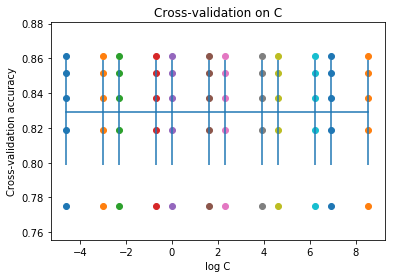

In [13]:
# plot the raw observations
for C_idx, C_value in enumerate(C_choices):
    accuracies_C_idx = accuracy_tab[:,C_idx]
    plt.scatter([np.log(C_value)]* len(accuracies_C_idx), accuracies_C_idx)
    
# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.mean(accuracy_tab,axis=0)
accuracies_std = np.std(accuracy_tab,axis=0)
plt.errorbar(np.log(C_choices), accuracies_mean, yerr=accuracies_std)

# Add text
plt.title('Cross-validation on C')
plt.xlabel('log C')
plt.ylabel('Cross-validation accuracy')

plt.show()

In [14]:
idx_best_C = np.argmax(accuracies_mean)
best_C = C_choices[idx_best_C]
model = sklearn.linear_model.LogisticRegression(C=best_C)
model.fit(X_train, y_train)
test_pred = model.predict(X_test)
accuracy_testset = sklearn.metrics.accuracy_score(test_pred, y_test)
print('best accuracy=',accuracy_testset)

best accuracy= 0.837209302326
